## Importing Libraries

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA


## Loading Data Set

In [135]:
data = pd.read_csv('drug_consumption.data.txt', sep=",", header=None)
#ColumnsX: 6 Neuroticisim, 7 Extraversion, 8 Openness, 9 Agreeableness, 10 Conscientiousness
data_x = data[[6, 7, 8, 9, 10]].values
#ColumnsY: 13 Alcohol, 18 Cannabis, 29 Nicotine
data_y = data[[13, 18, 29]].applymap(lambda x: int(x[2])).values

# 14 Amphetamines, 20 Cocaine
stimulants = data[[14, 20]].applymap(lambda x: int(x[2])).values
# 17 Benzodiazepine, 23 Heroin
depressants = data[[16, 23]].applymap(lambda x: int(x[2])).values

## Splitting Data

In [136]:
data_y = np.empty([len(data_x)])
temp_data_x = []
temp_data_y = []
#Max value for each drug is 6(used in the last day)
#By comparing the sum of each category, I can see which category of drug is most popular for each subject
for i in range(len(data_x)):
    stimulant_total = stimulants[i].sum()
    depressant_total = depressants[i].sum()
    
    #No preference
    if(stimulant_total == depressant_total):
        data_y[i] = 0
        temp_data_x.append(data_x[i])
        temp_data_y.append(0)
    #Prefers stimulants
    elif(stimulant_total > depressant_total and stimulant_total > 4):
        data_y[i] = 1
        temp_data_x.append(data_x[i])
        temp_data_y.append(1)
    #Prefers Depressants
    elif(stimulant_total < depressant_total and depressant_total > 4):
        data_y[i] = 2
        temp_data_x.append(data_x[i])
        temp_data_y.append(2)
data_x = np.array(temp_data_x)
data_y = np.array(temp_data_y)
print(len(data_x))
print(len(data_y))

1317
1317


In [137]:
def get_drug_category(category):
    if(category == 0):
        return 'Both'
    elif(category == 1):
        return 'Stimulant'
    elif(category == 2):
        return 'Depressant'

In [306]:
#using an 80/20 split between training and testing data
n_inputs = len(data_x) 
n_split = int(n_inputs * 0.8)

training_x, training_y = data_x[0:n_split, :], data_y[0:n_split]
testing_x, testing_y = data_x[n_split:n_inputs, :], data_y[n_split:n_inputs]

print(len(data_x))

1317


## Pre-processing Data

In [139]:
training_x = normalize(training_x)
testing_x = normalize(testing_x)

x_scaler = StandardScaler().fit(training_x)
x_scaler.transform(training_x)
x_scaler.transform(testing_x)

#Tried to input pca values into classifiers, the variance decreased but so did the score of the testing
pca = PCA(0.55)
pca = pca.fit(training_x, training_y)
actual_x = pca.transform(training_x)

## Classification Using Support Vector Machine

In [151]:
#tried increasing the C parameter, and the training score reached 70% but the testing went lower to 48%
svc = SVC(C=0.01)
svc.fit(training_x, training_y)
svc_training_prediction = svc.predict(training_x)
svc_testing_prediction = svc.predict(testing_x)

svc_training_score = svc.score(training_x, training_y)
svc_testing_score = svc.score(testing_x, testing_y)

print("SVC Training Score: %.2f%%" % (svc_training_score * 100))
print("SVC Testing Score: %.2f%%" % (svc_testing_score * 100))

SVC Training Score: 58.21%
SVC Testing Score: 69.70%


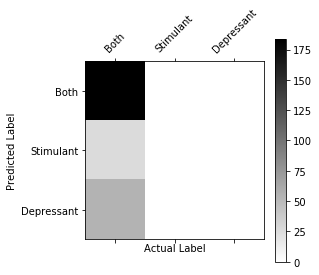

In [152]:
names = ['Both', 'Stimulant', 'Depressant']
actual = np.empty(len(testing_y), dtype="S4")
svc_predicted = np.empty(len(testing_y), dtype="S4")

for i in range(len(testing_y)):
    actual[i] = get_drug_category(testing_y[i])
    svc_predicted[i] = get_drug_category(svc_testing_prediction[i])


svc_cm = confusion_matrix(actual, svc_predicted)
plt.figure()
plt.matshow(svc_cm, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(len(svc_cm))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

## Classification Using Random Forest

In [159]:
rfc = RandomForestClassifier().fit(training_x, training_y)
rfc_training_prediction = rfc.predict(training_x)
rfc_testing_prediction = rfc.predict(testing_x)

rfc_training_score = rfc.score(training_x, training_y)
rfc_testing_score = rfc.score(testing_x, testing_y)

print("RFC Training Score: %.2f%%" % (rfc_training_score * 100))
print("RFC Testing Score: %.2f%%" % (rfc_testing_score * 100))

RFC Training Score: 97.06%
RFC Testing Score: 64.39%


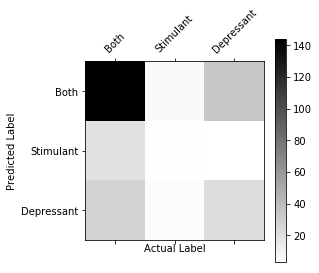

In [160]:
rfc_predicted = np.empty(len(testing_y), dtype="S4")

for i in range(len(testing_y)):
    rfc_predicted[i] = get_drug_category(rfc_testing_prediction[i])

rfc_cm = confusion_matrix(actual, rfc_predicted)
plt.figure()
plt.matshow(rfc_cm, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(len(rfc_cm))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

## Classification Using K-Nearest Neighbours

In [217]:
knc = KNeighborsClassifier(n_neighbors=20)
knc.fit(training_x, training_y)

knc_training_prediction = knc.predict(training_x)
knc_testing_prediction = knc.predict(testing_x)

knc_training_score = knc.score(training_x, training_y)
knc_testing_score = knc.score(testing_x, testing_y)

print("KNC Training Score: %.2f%%" % (knc_training_score * 100))
print("KNC Testing Score: %.2f%%" % (knc_testing_score * 100))

KNC Training Score: 62.68%
KNC Testing Score: 67.42%


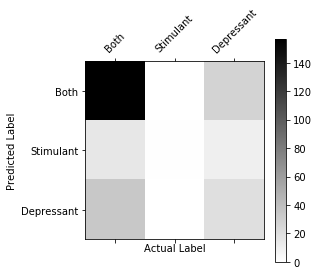

In [218]:
knc_predicted = np.empty(len(testing_y), dtype="S4")

for i in range(len(testing_y)):
    knc_predicted[i] = get_drug_category(knc_testing_prediction[i])

knc_cm = confusion_matrix(actual, knc_predicted)
plt.figure()
plt.matshow(knc_cm, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(len(knc_cm))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

## Classification Using Ada Boost

In [225]:
abc = AdaBoostClassifier(learning_rate=0.2).fit(training_x, training_y)
abc_training_prediction = abc.predict(training_x)
abc_testing_prediction = abc.predict(testing_x)

abc_training_score = abc.score(training_x, training_y)
abc_testing_score = abc.score(testing_x, testing_y)

print("ABC Training Score: %.2f%%" % (abc_training_score * 100))
print("ABC Testing Score: %.2f%%" % (abc_testing_score * 100))

ABC Training Score: 61.63%
ABC Testing Score: 67.42%


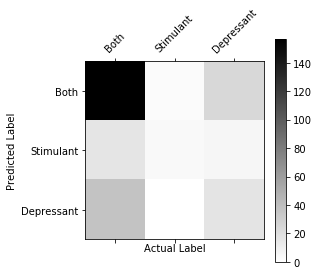

In [226]:
abc_predicted = np.empty(len(testing_y), dtype="S4")

for i in range(len(testing_y)):
    abc_predicted[i] = get_drug_category(abc_testing_prediction[i])

abc_cm = confusion_matrix(actual, abc_predicted)
plt.figure()
plt.matshow(abc_cm, cmap=plt.cm.gray_r)
plt.colorbar()
tick_marks = np.arange(len(abc_cm))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

## Result Visualization

In [227]:
def get_class_distributions(given_class):
    proportions = np.zeros(3)
    for i in range(given_class.shape[0]):
        proportions[int(given_class[i])] += 1
    return proportions

def set_distributions(rect, value):
    if(value > 0): 
        width = rect.get_width() 
        height = rect.get_height() 

        x = rect.get_x() + width / 2
        y = rect.get_y() + height / 2

        ax.text(x, y, "%s" % (int(value)), color='white', weight='bold',horizontalalignment='center', verticalalignment='center')

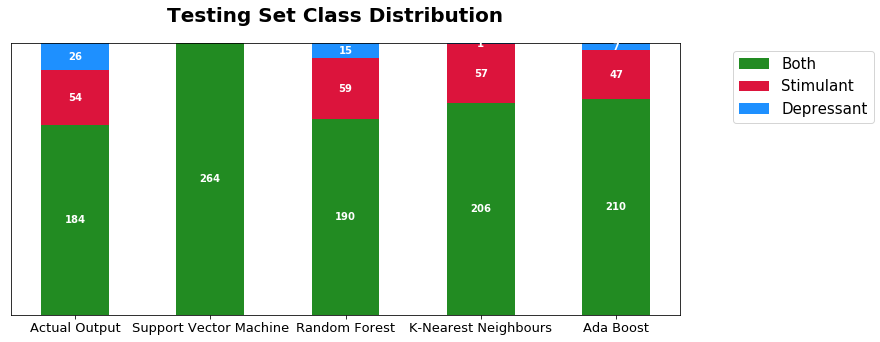

In [233]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))
fig.suptitle('Testing Set Class Distribution', weight='bold', fontsize=20)
distributions = np.array([get_class_distributions(testing_y),
                        get_class_distributions(svc_testing_prediction),
                        get_class_distributions(rfc_testing_prediction),
                        get_class_distributions(knc_testing_prediction),
                        get_class_distributions(abc_testing_prediction)])
xlabels = ["Actual Output", "Support Vector Machine", "Random Forest", "K-Nearest Neighbours", "Ada Boost"]
width = 0.5

for i in range(distributions.shape[0]):
    rect1 = ax.bar(i, distributions[i,0], width=width, color='forestgreen', label='Both' if i == 0 else "")
    set_distributions(rect1.patches[0], distributions[i,0])
    rect2 = ax.bar(i, distributions[i,1], bottom=distributions[i,0], width=width, color='crimson', label='Stimulant' if i == 1 else "")
    set_distributions(rect2.patches[0], distributions[i,1])
    rect3 = ax.bar(i, distributions[i,2], bottom=distributions[i,0] + distributions[i,1], width=width, color='dodgerblue', label='Depressant' if i== 2 else "")
    set_distributions(rect3.patches[0], distributions[i,2])

plt.xticks([0,1,2,3,4], xlabels, fontsize=13)
plt.yticks([], fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1), prop={'size':15}, frameon=True)
plt.show()

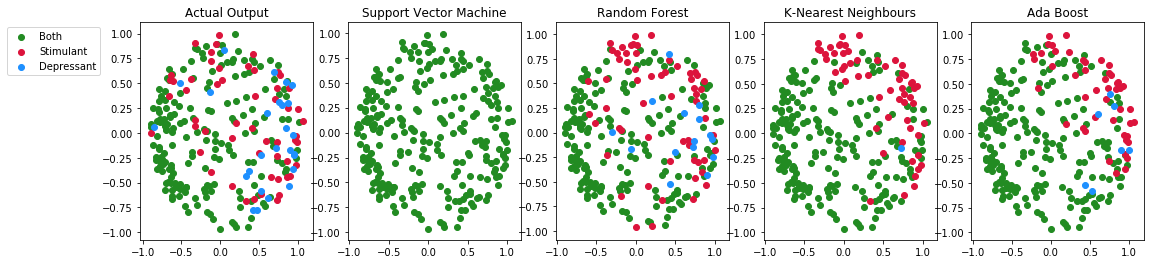

In [229]:
fig, ax = plt.subplots(1, 5, figsize=(18, 4))
label_results = np.array([testing_y, svc_testing_prediction, rfc_testing_prediction, knc_testing_prediction, abc_testing_prediction])

pca = PCA(0.5)
pca_testing = pca.fit_transform(testing_x, testing_y)

colors = ['forestgreen', 'crimson', 'dodgerblue']
labels = ['Both', 'Stimulant', 'Depressant']

for k in range(len(xlabels)):
    
    ax[k].set_title(xlabels[k])
    for i in range(len(colors)):
        x = [pca_testing[j,0] for j in range(len(pca_testing)) if label_results[k, j] == i]
        y = [pca_testing[j,1] for j in range(len(pca_testing)) if label_results[k, j] == i]
        ax[k].scatter(x, y, c=colors[i], label=labels[i])

ax[0].legend(bbox_to_anchor=(-0.2,1))
plt.show()



Actual Output Class Predictions
Both Class: 184 correct out of 184
Stimulant Class: 54 correct out of 54
Depressant Class: 26 correct out of 26

Support Vector Machine Class Predictions
Both Class: 184 correct out of 184
Stimulant Class: 0 correct out of 54
Depressant Class: 0 correct out of 26

Random Forest Class Predictions
Both Class: 144 correct out of 184
Stimulant Class: 22 correct out of 54
Depressant Class: 4 correct out of 26

K-Nearest Neighbours Class Predictions
Both Class: 157 correct out of 184
Stimulant Class: 20 correct out of 54
Depressant Class: 1 correct out of 26

Ada Boost Class Predictions
Both Class: 157 correct out of 184
Stimulant Class: 17 correct out of 54
Depressant Class: 4 correct out of 26



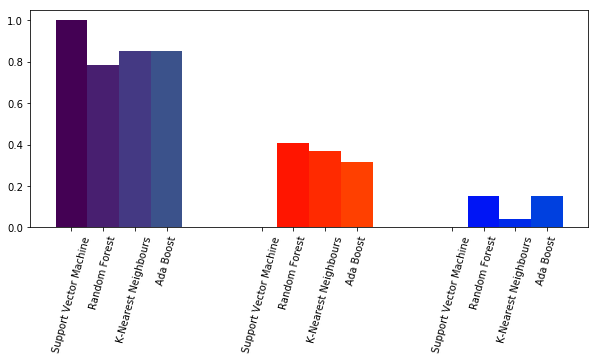

In [305]:
sums = np.zeros([5,3])
total_sums = [184, 54, 26]
for i in range(len(label_results)):
    
    for j in range(len(testing_y)):
        if(testing_y[j] == label_results[i, j]):
            sums[i, testing_y[j]] += 1
    print("%s Class Predictions" % xlabels[i])
    print("Both Class: %d correct out of 184" % sums[i, 0])
    print("Stimulant Class: %d correct out of 54" % sums[i,1])
    print("Depressant Class: %d correct out of 26" % sums[i,2])
    print("")
width=0.25
colors=np.array([[plt.cm.viridis(i/12) for i in range(4)],
                 [plt.cm.autumn(i/12) for i in range(4)],
                 [plt.cm.winter(i/12) for i in range(4)]])
indices = []
#0, 0.25, 0.50, 0.75
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
for i in range(1, len(label_results)):
    for j in range(3):
        ax.bar(i*width + j * 1.5, sums[i,j]/total_sums[j], width=width, color=colors[j, i-1])
        indices.append(i*width + j * 1.5)

indices = np.sort(np.array(indices))
plt.xticks(indices, xlabels[1:] * 3, rotation = 75)

plt.show()